<function matplotlib.pyplot.show(*args, **kw)>

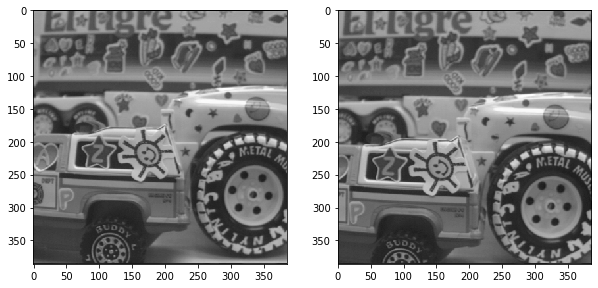

In [114]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

im_a = cv2.imread('trucka.bmp')
im_b = cv2.imread('truckb.bmp')
im_a = cv2.cvtColor(im_a, cv2.COLOR_BGR2GRAY).astype("float")
im_b = cv2.cvtColor(im_b, cv2.COLOR_BGR2GRAY).astype("float")

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot( 1, 2, 1 )
ax1.imshow(im_a, cmap='gray')
ax2 = fig.add_subplot( 1, 2, 2 )
ax2.imshow(im_b, cmap='gray')
plt.show

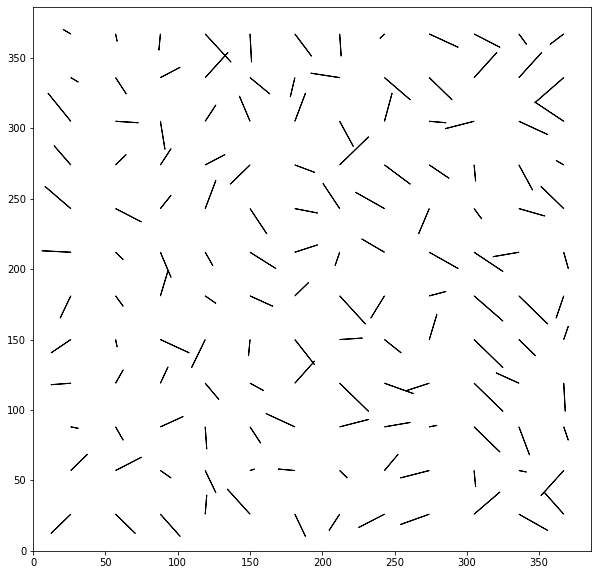

In [147]:
block_size = 31
search_range = 40
init = 10

fig = plt.figure(figsize=(10, 10))
ax2 = fig.add_subplot( 1, 1, 1 )
ax2.set_xlim((0, im_a.shape[0]))
ax2.set_ylim((0, im_a.shape[1]))

min_err = 10000000
# center_x of the block in image_a
cx = init + math.ceil(block_size / 2)
while cx < im_a.shape[0]:
    # center_y of the block in image_a
    cy = init + math.ceil(block_size / 2)
    while cy < im_a.shape[1]:
        
        # sum of pixels in the block
        if cx + math.floor(block_size / 2) < im_a.shape[0] and cy + math.floor(block_size / 2) < im_a.shape[1]:
            pixel_sum = 0
            for x in range(0, block_size):
                x += cx - math.floor(block_size / 2) 
                for y in range(0, block_size):
                    y += cy - math.floor(block_size / 2)
                    pixel_sum += im_a[x, y]
                        
            for dx in np.linspace(-int(search_range/2), int(search_range/2), 20):
                # center_x of the block that is being matched in image_b
                cx_p = cx + int(dx)
                if cx_p >= 0 and cx_p < im_b.shape[0]:
                    for dy in np.linspace(-int(search_range/2), int(search_range/2), 20):
                        # center_y of the block that is being matched in image_b
                        cy_p = cy + int(dy)
                        if cy_p >= 0 and cy_p < im_b.shape[1]:
                            #ax2.plot(cx_p, cy_p, 'ro')
                            #plt.draw()

                            # sum of pixels in the block that is being matched
                            if cx_p + math.floor(block_size/2) < im_b.shape[0] and cy_p + math.floor(block_size/2) < im_b.shape[1]:
                                pixel_sum_p = 0
                                for x_p in range(0, block_size):
                                    x_p += cx_p - math.floor(block_size / 2)
                                    for y_p in range(0, block_size):
                                        y_p += cy_p - math.floor(block_size / 2)
                                        pixel_sum_p += im_b[x_p, y_p]

                                err = np.abs(pixel_sum - pixel_sum_p)
                                if err < min_err:
                                    min_err = err
                                    min_dx = dx
                                    min_dy = dy
                                    length = math.sqrt(min_dx**2 + min_dy**2)
            #print(length)
            ax2.arrow(cx, cy, min_dx, min_dy, width=0.005)
            plt.draw()

            min_err = 10000000
        cy += block_size
    cx += block_size
#plt.show()     

In [97]:
pixel_sum

array([70, 70, 70], dtype=uint8)

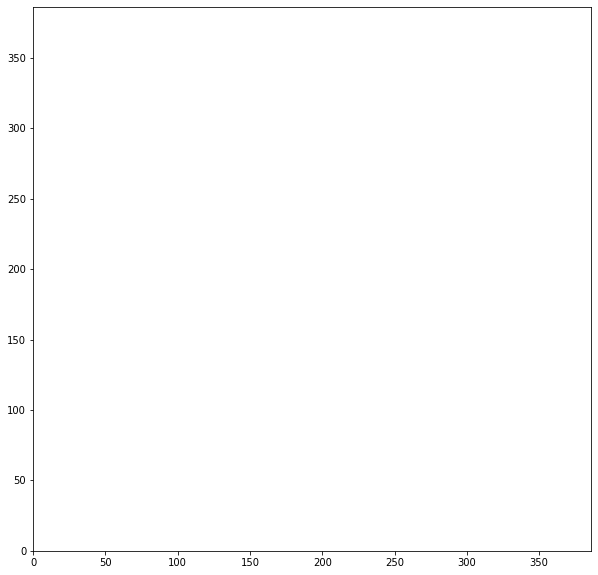

In [49]:
block_size = 31
search_range = 20
init = 10

fig = plt.figure(figsize=(10, 10))
ax2 = fig.add_subplot( 1, 1, 1 )
ax2.set_xlim((0, im_a.shape[0]))
ax2.set_ylim((0, im_a.shape[1]))

min_err = 100000000
center_pos = []

# center_x of the block in image_a
cx = init + math.ceil(block_size / 2)
while cx < im_a.shape[0]:
    # center_y of the block in image_a
    cy = init + math.ceil(block_size / 2)
    while cy < im_a.shape[1]:
        center_pos.append([cx, cy])
        
        if cx == 57 and cy == 367:
            # sum of pixels in the block
            pixel_sum = 0
            for x in range(0, block_size):
                x += cx - math.floor(block_size / 2) 
                if x >= 0 and x < im_a.shape[0]:
                    for y in range(0, block_size):
                        y += cy - math.floor(block_size / 2)
                        if y >= 0 and y < im_a.shape[1]:
                            pixel_sum += im_a[x, y]
                        
            for dx in np.linspace(-int(search_range/2), int(search_range/2), 21):
                # center_x of the block that is being matched in image_b
                cx_p = cx + int(dx)
                if cx_p >= 0 and cx_p < im_b.shape[0]:
                    for dy in np.linspace(-int(search_range/2), int(search_range/2), 21):
                        # center_y of the block that is being matched in image_b
                        cy_p = cy + int(dy)
                        if cy_p >= 0 and cy_p < im_b.shape[1]:
                            #ax2.plot(cx_p, cy_p, 'ro')
                            #plt.draw()

                            # sum of pixels in the block that is being matched
                            pixel_sum_p = 0
                            for x_p in range(0, block_size):
                                x_p += cx_p - math.floor(block_size / 2)
                                if x_p >= 0 and x_p < im_b.shape[0]:
                                    for y_p in range(0, block_size):
                                        y_p += cy_p - math.floor(block_size / 2)
                                        if y_p >= 0 and y_p < im_b.shape[1]:
                                            pixel_sum_p += im_b[x_p, y_p]
                                        
                    err = np.abs(pixel_sum - pixel_sum_p)
                    if err < min_err:
                        min_err = err
                        min_dx = dx
                        min_dy = dy
                        length = math.sqrt(min_dx**2 + min_dy**2)
        #print(length)
        ax2.arrow(cx, cy, min_dx, min_dy, width=0.005)
        plt.draw()

        min_err = 100000000
        '''
        
        cy += block_size
    cx += block_size
    

<function matplotlib.pyplot.show(*args, **kw)>

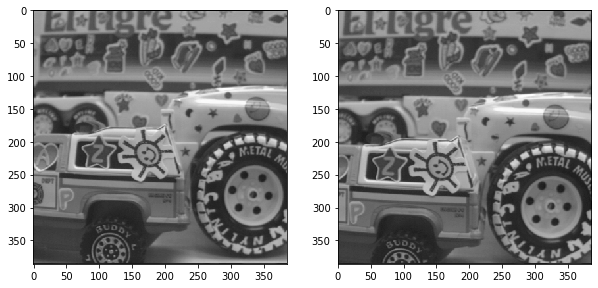

In [42]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

im_a = cv2.imread('trucka.bmp')
im_b = cv2.imread('truckb.bmp')
# 若要進行像素的加減，則需要將資料型態轉換為float，否則會overflow
trucka = cv2.cvtColor(im_a, cv2.COLOR_BGR2GRAY).astype("float")
truckb = cv2.cvtColor(im_b, cv2.COLOR_BGR2GRAY).astype("float")

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot( 1, 2, 1 )
ax1.imshow(trucka, cmap='gray')
ax2 = fig.add_subplot( 1, 2, 2 )
ax2.imshow(truckb, cmap='gray')
plt.show

In [38]:
def get_block_position(image, block_size, stride):
    position_list = []
    block_list = []
    for r in range(0, image.shape[0] - block_size, stride):
        for c in range(0, image.shape[1] - block_size, stride):
            position_list.append([r, c])
            block_list.append(image[r:r+block_size, c:c+block_size])
    return position_list, block_list

def get_motion(position_list_a, block_list_a, position_list_b, block_list_b, search_range):
    motion_list = []
    for position_a, block_a in zip(position_list_a, block_list_a):
        min_diff = 9999999
        for position_b, block_b in zip(position_list_b, block_list_b):
            distance = np.sqrt((position_a[0]-position_b[0])**2 + (position_a[1]-position_b[1])**2)
            if distance <= search_range:
                diff = np.sum(abs(block_a - block_b))
                if diff < min_diff:
                    min_diff = diff
                    match_position = position_b
        dx, dy = match_position[0] - position_a[0], match_position[1] - position_a[1]
        motion_list.append((dx, dy))
    return motion_list


In [58]:
block_size = 9
search_range = 50
position_list_b, block_list_b = get_block_position(truckb, block_size, stride=1)
position_list_a, block_list_a = get_block_position(trucka, block_size, stride=block_size)
motion_tup = get_motion(position_list_a, block_list_a, position_list_b, block_list_b, search_range)


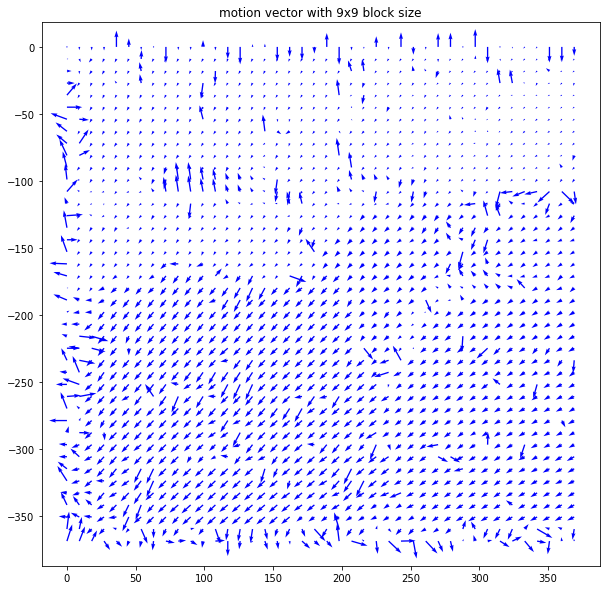

In [59]:
X = [t[1] for t in position_list_a]
Y = [-t[0] for t in position_list_a]
U = [t[1] for t in motion_tup]
V = [-t[0] for t in motion_tup]

plt.figure(figsize=(10,10))
plt.quiver(X, Y, V, U, color='blue')
plt.title("motion vector with {}x{} block size".format(block_size,block_size))
plt.show()
